In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("src")

In [3]:
from boekfos.core import Plan,Rect,Box
from boekfos.space import Room, Floor, Garden
from boekfos.outside import Carpark, Terrace, Roof
from boekfos.furniture import Closet, Furniture, Table
from boekfos.orientation import Side

19.200000000000003


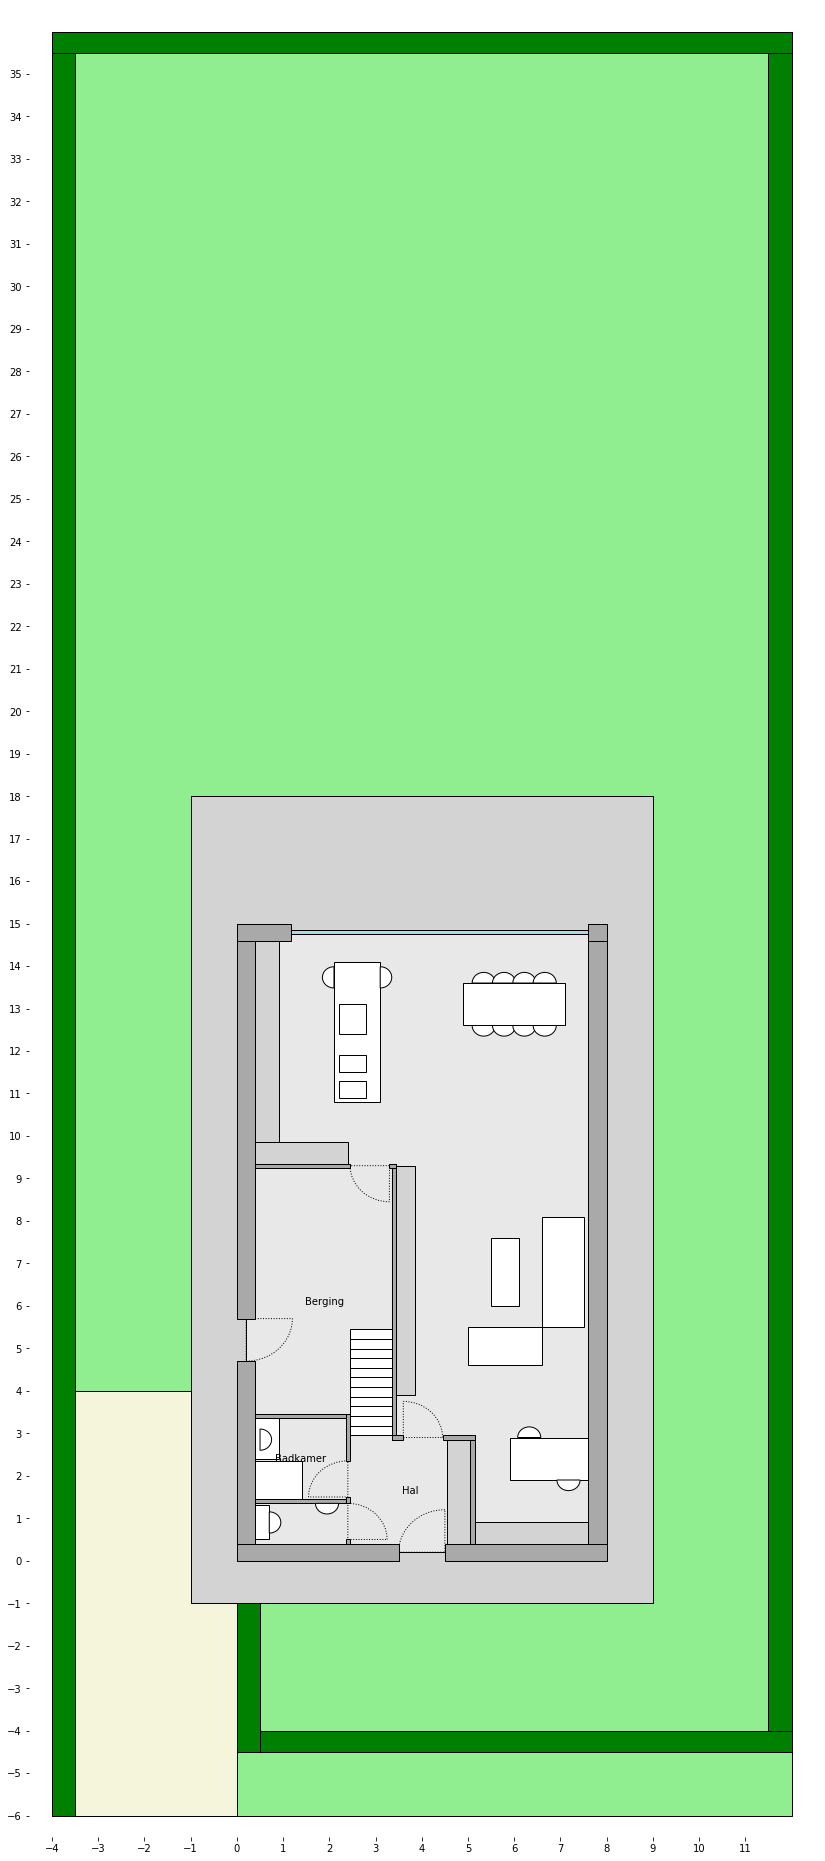

In [8]:
p = Plan()
f = Floor(Box(0,0,8,15))
p.add(f)
garden = Garden(f.outer.gobottom().edit(-4,-6,4,42-6)) 
p.add(garden)
garden.bottomwall.hide()
garden.rightwall.hole(0,1.25)
garden2 = Garden(f.outer.gobottom().edit(0,-4.5,4,-1),grass=False)
p.add(garden2)
garden2.topwall.hide()
garden2.rightwall.hide()
carpark = Carpark(Box(-4,-6,0,4))
p.add(carpark)
carpark.setlevel(11)
garden.ground.setlevel(12)
p.add(Terrace(f.outer.edit(-1,-1,1,3)))

f.topwall.window(1,-0.25)


# KEUKEN
keukenkast1 = f.leftwall.closet(Side.RIGHT,0.5,-5.5,0)
p.add(keukenkast1)

kookeiland = Table(keukenkast1.gotop().goright().edit(1.2,-4,1.2+1,-0.7))
vuur = Furniture(kookeiland.boundingbox().gotop().edit(0.1,-1-0.7,-0.3,-1))
afwasbak1 = Furniture(kookeiland.boundingbox().gobottom().edit(0.1,0.1,-0.3,0.1+0.4))
afwasbak2 = Furniture(afwasbak1.edit(0,0.6,0,0.6))
p.add(kookeiland)
p.add(vuur)
p.add(afwasbak1)
p.add(afwasbak2)
p.add(kookeiland.chair(Side.LEFT,7,8))
p.add(kookeiland.chair(Side.RIGHT,7,8))

tafel = Table(f.inner.gotop().goright().edit(-0.5,-1,-0.5,-1).edit(-2.2,-1,0,0))
p.add(tafel)
for i in range(4):
    p.add(tafel.chair(Side.TOP,i,4))
    p.add(tafel.chair(Side.BOTTOM,i,4))

# TOILET + BADKAMER
toilet = Room(f.inner.gobottom().goleft().edit(-0.05,0,2,1))
toilet.leftwall.hide()
toilet.bottomwall.hide()
p.add(toilet)
p.add(toilet.leftwall.toilet(Side.RIGHT))
p.add(toilet.topwall.sink(Side.BOTTOM,-0.5))

badkamer = Room(toilet.center.gotop().edit(0,0,0,2),text="Badkamer")
badkamer.leftwall.hide()
p.add(badkamer)
p.add(badkamer.leftwall.sink(Side.RIGHT,1.5,0.1))
p.add(badkamer.leftwall.table(Side.RIGHT,0.5,1,0))
p.add(badkamer.leftwall.shower(Side.TOP,Side.RIGHT,0))


# HAL
hal = Room(Box(badkamer.center.right,f.inner.bottom,f.inner.right-2.5,f.inner.bottom + 2.5),text="Hal")
hal.leftwall.hide()
hal.topwall.hole(0,0.95)
hal.bottomwall.hide()
f.add(hal)

p.add(hal.rightwall.closet(Side.LEFT,0.5,0,-0.05))

## BERGRUIMTE
berging = Room(Box(f.inner.left,hal.center.top,f.inner.left+3,keukenkast1.bottom),text="Berging")
berging.leftwall.hide()
berging.bottomwall.hide()
p.add(berging)


keukenkast2 = berging.topwall.closet(Side.TOP,0.5,0,2)
p.add(keukenkast2)
livingkast = berging.rightwall.closet(Side.RIGHT,0.4,1,0)
p.add(livingkast)

# SOFA, TV en BUREAU
zetelbottom = f.inner.top - 10
zetelkorttop = zetelbottom + 0.9
zetellangtop = zetelbottom + 3.50
zetelright = f.inner.right - 0.1
zetellangleft = zetelright - 0.9
zetelkortleft = zetelright - 2.5
sofa1 = Furniture(Box(zetelkortleft,zetelbottom,zetellangleft,zetelkorttop))
sofa2 = Furniture(Box(zetellangleft,zetelkorttop,zetelright,zetellangtop))
sofatafel = Furniture(Box(zetelkortleft+0.5,zetelkorttop+0.5,zetellangleft-0.5,zetellangtop-0.5))
p.add(sofa1)
p.add(sofa2)
p.add(sofatafel)


bureau = Table(f.inner.gobottom().goright().edit(-1.7,1.5,0,1.5+1))
p.add(bureau)
p.add(bureau.chair(Side.TOP,0,3))
p.add(bureau.chair(Side.BOTTOM,2,3))
p.add(f.bottomwall.closet(Side.TOP,0.5,-2.5-0.2,-0.2))

stairs = berging.bottomwall.stairs(Side.TOP,-0.95,-0.05)
p.add(stairs)

berging.topwall.door(Side.LEFT,Side.BOTTOM,-0.1)
toilet.rightwall.door(Side.TOP,Side.RIGHT,0.1)
badkamer.rightwall.door(Side.TOP,Side.LEFT,0.1)
hal.topwall.door(Side.RIGHT,Side.TOP,-1.5)
f.leftwall.door(Side.BOTTOM,Side.RIGHT,5.5,1)
f.bottomwall.door(Side.LEFT,Side.TOP,4.3,1)

print(berging.center.surface())
p.draw(figsize=0.8)

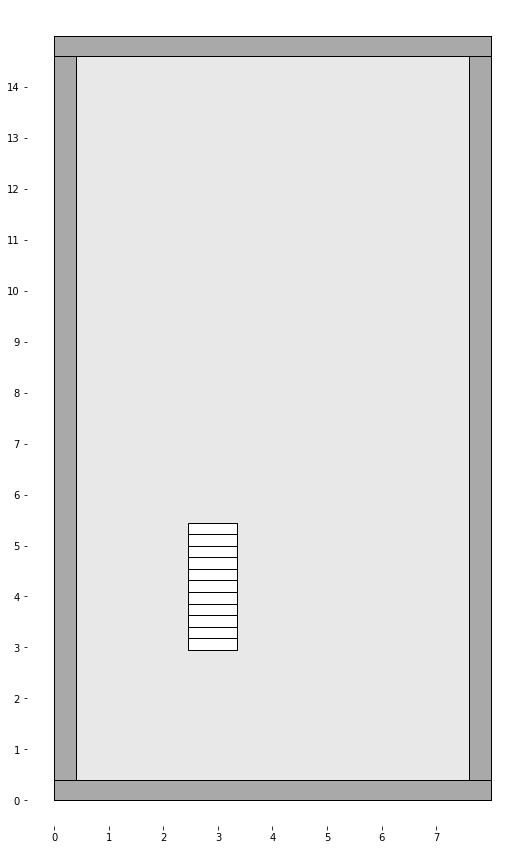

In [4]:
p = Plan()
f = Floor(Box(0,0,8,15))
#p.add(Garden(f.outer.gobottom().edit(-4,-6,4,42-6)))
#p.add(Carpark(f.outer.gobottom().edit(-1,-6,-2,-1)))
#p.add(Terrace(f.outer.edit(-1,-1,1,3)))
p.add(f)
p.add(stairs)
p.draw()

12.832499999999998
13.072499999999996
12.914999999999997
13.530000000000001
7.705000000000003


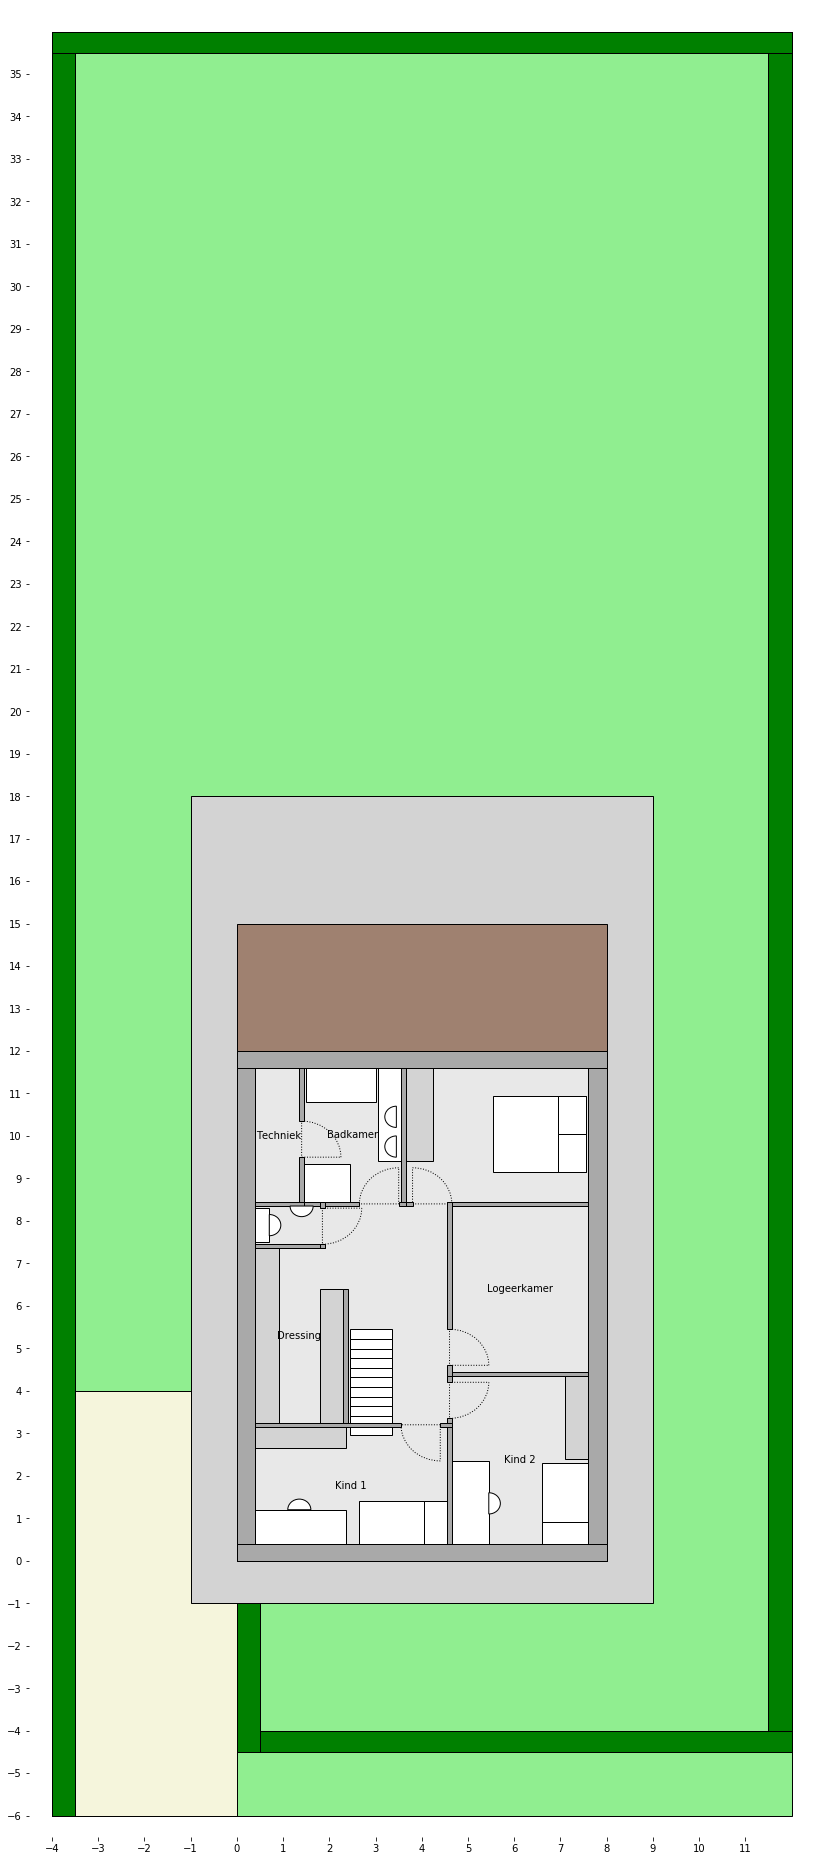

In [33]:
p = Plan()
f = Floor(Box(0,0,8,12))
p.add(f)
roof = Roof(Box(0,0,8,15))
garden = Garden(f.outer.gobottom().edit(-4,-6,4,42-6)) 
p.add(garden)
garden.bottomwall.hide()
garden.rightwall.hole(0,1.25)
garden2 = Garden(f.outer.gobottom().edit(0,-4.5,4,-1),grass=False)
p.add(garden2)
garden2.topwall.hide()
garden2.rightwall.hide()
carpark = Carpark(Box(-4,-6,0,4))
p.add(carpark)
carpark.setlevel(11)
garden.ground.setlevel(12)
p.add(Terrace(roof.edit(-1,-1,1,3)))
p.add(roof)

p.add(stairs)

slp1 = Room(f.inner.gobottom().goleft().edit(-0.05,-0.05,4.2,2.8),text="Kind 1")
slp1.setlevel(9.5)
slp1.leftwall.hide()
slp1.bottomwall.hide()
print(slp1.surface())
p.add(slp1)

slp2 = Room(slp1.center.goright().edit(0,0,3.05,1.2),text="Kind 2")
print(slp2.surface())
slp2.bottomwall.hide()
slp2.rightwall.hide()
p.add(slp2)

slp3 = Room(slp2.center.gotop().edit(0,0,0,4),text="Logeerkamer")
print(slp3.surface())
p.add(slp3)

masterslp = Room(f.inner.gotop().goright().edit(-4,-3.2,0,0))
print(masterslp.surface())
p.add(masterslp)
p.add(masterslp.leftwall.closet(Side.RIGHT,0.6,1,0))
masterslp.topwall.hide()
masterslp.rightwall.hide()

dressing = Room(slp1.center.gotop().goleft().edit(0,0,2,4.2),text="Dressing")
p.add(dressing)
p.add(dressing.leftwall.closet(Side.RIGHT,0.5,0.05,-0.05))
p.add(dressing.rightwall.closet(Side.LEFT,-0.5,0.05,-1))
dressing.leftwall.hide()
dressing.rightwall.hole(-1,0)
dressing.topwall.hide()


toilet = Room(dressing.center.gotop().edit(0,0,-0.5,1))
p.add(toilet)
toilet.rightwall.door(Side.BOTTOM,Side.RIGHT,-0.1)
p.add(toilet.leftwall.toilet(Side.RIGHT))
p.add(toilet.topwall.sink(Side.BOTTOM,-0.5))

techniek = Room(f.inner.gotop().goleft().edit(0,-3.2,1,0),text="Techniek")
p.add(techniek)
techniek.leftwall.hide()
techniek.topwall.hide()
techniek.rightwall.hide()


badkamer = Room(Box(techniek.center.right,techniek.center.bottom,masterslp.center.left,masterslp.center.top+0.05),
               text="Badkamer")
print(badkamer.surface())
badkamer.topwall.hide()
p.add(badkamer)

p.add(badkamer.topwall.table(Side.BOTTOM,0.8,0.1,-0.6))
p.add(badkamer.rightwall.table(Side.LEFT,0.5,1,0))
p.add(badkamer.rightwall.sink(Side.LEFT,1.4,0.1))
p.add(badkamer.rightwall.sink(Side.LEFT,2.1,0.1))
p.add(badkamer.leftwall.shower(Side.TOP,Side.RIGHT,0))


p.add(slp1.topwall.closet(Side.BOTTOM,-0.5,0,2))
p.add(slp1.bottomwall.bureau(Side.TOP,0,2))
p.add(slp1.bottomwall.bed(Side.LEFT,Side.TOP,-0.01))

#p.add(slp1.bottomwall.closet(Side.TOP,0.5,-2,0))
#p.add(slp1.topwall.bureau(Side.BOTTOM,0,2))
#p.add(slp1.bottomwall.bed(Side.RIGHT,Side.TOP,0))

p.add(slp2.leftwall.bureau(Side.RIGHT,0,2))
p.add(slp2.rightwall.bed(Side.TOP,Side.LEFT,0))
p.add(slp2.rightwall.closet(Side.LEFT,-0.5,-2,-0.05))

p.add(masterslp.rightwall.doublebed(Side.TOP,Side.LEFT,0.8))


badkamer.leftwall.door(Side.TOP,Side.RIGHT,1.1)
badkamer.bottomwall.door(Side.LEFT,Side.TOP,-0.1)
slp1.topwall.door(Side.LEFT,Side.BOTTOM,-0.2)
slp2.leftwall.door(Side.BOTTOM,Side.RIGHT,-0.2)
slp3.leftwall.door(Side.TOP,Side.RIGHT,0.2)
masterslp.bottomwall.door(Side.RIGHT,Side.TOP,0.2)

p.draw(0.8)